In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

## 1 - We start by importing the data and begin explorations

In [2]:
metrics_by_genre = pd.read_csv('data_by_genres.csv')

In [3]:
metrics_by_genre.head(5)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In [4]:
rock_group  = metrics_by_genre[metrics_by_genre['genres'].str.contains('rock', na = False)]
rock_group

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
13,acid rock,0.220659,0.459124,254073.526002,0.594895,0.160757,0.229053,-11.273829,0.071269,129.135278,0.560707,29.791914,2,1
22,acoustic rock,0.344262,0.562048,205446.857143,0.709429,0.207953,0.123307,-5.970048,0.062462,121.935500,0.741057,42.976190,8,1
23,action rock,0.495437,0.568000,181958.000000,0.464167,0.103000,0.208500,-11.764333,0.041833,106.398833,0.588667,0.000000,11,1
33,african rock,0.132827,0.671542,239156.458333,0.657000,0.093929,0.166496,-8.653792,0.069300,116.946958,0.646333,42.666667,8,1
54,album rock,0.181420,0.517314,269234.622643,0.659917,0.083199,0.212517,-9.865573,0.056450,124.401441,0.548134,35.423908,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,venezuelan rock,0.401731,0.610571,235833.214286,0.594143,0.001569,0.152700,-8.406571,0.054221,129.616429,0.700143,39.857143,7,1
3142,vintage rockabilly,0.514050,0.609000,190966.500000,0.748500,0.004520,0.255000,-6.314000,0.032500,136.795500,0.759000,23.000000,7,0
3180,welsh rock,0.075228,0.481417,228852.347222,0.804924,0.072872,0.252684,-6.224819,0.090074,118.495444,0.523715,42.500000,7,1
3212,yacht rock,0.336969,0.612327,244547.961994,0.537767,0.035622,0.155917,-11.294052,0.055117,115.622869,0.630199,37.837857,7,1


In [5]:
rock_condensed = {
    'genre': 'rock',
    'acousticness': rock_group['acousticness'].mean(),
    'danceability': rock_group['danceability'].mean(),
    'duration_s': rock_group['duration_ms'].mean()/1000,
    'loudness': rock_group['loudness'].mean(),
    'speechiness': rock_group['speechiness'].mean(),
    'tempo': rock_group['tempo'].mean(),
    'popularity': rock_group['popularity'].mean()}
condensed = pd.DataFrame(data=rock_condensed, index=[0])
condensed

,genre,acousticness,danceability,duration_s,loudness,speechiness,tempo,popularity
0,rock,0.235712,0.535643,249.349512,-8.600366,0.063183,124.080479,34.759409


#### Since the amount of genres it is too big we are condensing the genres to their farest parent that it's still considered being that genre

In [6]:
def create_condensed_df(genres, df_original):
    columns = ['genre', 'acousticness', 'danceability', 'duration_s', 'loudness', 'speechiness', 'tempo', 'instrumentalness','popularity']
    df_ = pd.DataFrame(columns=columns)
    for genre in genres:
        genre_group  = df_original[df_original['genres'].str.contains(genre, na = False)]
        genre_condensed = {
            'genre': genre,
            'acousticness': genre_group['acousticness'].mean(),
            'danceability': genre_group['danceability'].mean(),
            'instrumentalness': genre_group['instrumentalness'].mean(),
            'duration_s': genre_group['duration_ms'].mean()/1000,
            'loudness': genre_group['loudness'].mean(),
            'speechiness': genre_group['speechiness'].mean(),
            'tempo': genre_group['tempo'].mean(),
            'popularity': genre_group['popularity'].mean()}
        genre_df = pd.DataFrame(data=genre_condensed, index=[0])
        df_ = df_.append(genre_df, ignore_index=True)
    return df_

In [7]:
df_condensed = create_condensed_df(['rock', 'pop', 'jazz', 'blues', 
                                    'funk', 'disco', 'rap', 'metal', 
                                    'bolero', 'country','reggaeton', 
                                    'trap', 'reggae', 'orchestra',
                                    'dance', 'electro', 'opera', 'trance'], metrics_by_genre)
normalized_popularity = (df_condensed['popularity'].values - np.amin(df_condensed['popularity'].values))/(np.amax(df_condensed['popularity'].values) - np.amin(df_condensed['popularity'].values))
df_condensed['norm_popularity'] = normalized_popularity
df_condensed

,genre,acousticness,danceability,duration_s,loudness,speechiness,tempo,instrumentalness,popularity,norm_popularity
0,rock,0.235712,0.535643,249.349512,-8.600366,0.063183,124.080479,0.142021,34.759409,0.726017
1,pop,0.328187,0.588313,241.340823,-8.636236,0.071243,121.585767,0.129534,35.454131,0.746421
2,jazz,0.593118,0.534834,299.021178,-13.658272,0.065059,113.391264,0.424609,27.282699,0.506426
3,blues,0.490284,0.553257,232.380899,-10.985367,0.064342,121.687158,0.103192,28.121382,0.531058
4,funk,0.230285,0.639778,263.766450,-8.621705,0.110294,118.477960,0.219315,26.709954,0.489605
5,disco,0.127142,0.692658,370.241147,-9.158841,0.056020,121.325023,0.271387,28.336930,0.537389
6,rap,0.186489,0.701288,238.769759,-7.258838,0.164892,119.614276,0.092352,44.088081,1.000000
7,metal,0.055292,0.386876,288.046942,-6.968170,0.088073,124.827355,0.304731,29.156984,0.561474
8,bolero,0.663765,0.625448,205.899145,-10.896144,0.045477,116.145075,0.016951,34.299481,0.712509
9,country,0.439480,0.590874,208.065729,-9.560399,0.058839,119.063364,0.065909,38.419312,0.833508


#### Now that we have conndesed into the root genres we can visualize in the look for patterns that might enlight us to understand that characteristics make a genre more popular than others

In [8]:

fig =go.Figure()
fig.add_trace(go.Scatter(x=df_condensed['genre'], y=df_condensed['danceability'], mode='markers + lines',name="danceability",showlegend=True))
fig.add_trace(go.Scatter(x=df_condensed['genre'], y=df_condensed['norm_popularity'], mode='markers + lines',name="Popularity",showlegend=True))
fig.add_trace(go.Scatter(x=df_condensed['genre'], y=df_condensed['speechiness'], mode='markers + lines',name="speechiness",showlegend=True))
fig.update_layout(title='Comparison',height=600)
fig.show()

#### It seems to be some of a correlation between this 3 characteristics, being more notorious between danceability and popularity

In [9]:
fig = px.bar(df_condensed, x='genre', y='popularity', color='popularity')
fig.show()

In [10]:
fig = px.bar(df_condensed, x='genre', y='duration_s', color='duration_s')
fig.show()

### Correlation between features review

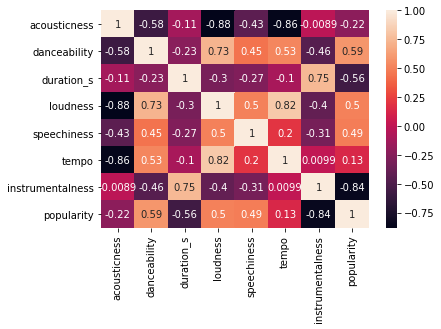

In [11]:
X = df_condensed.drop('norm_popularity', axis=1)
sns.heatmap(X.corr(), annot=True)

#### It seems that if more speachiness, loudness and danceability there is in a song increases probability to be more pupular. The other features don't seem to affect too mucho neither positively or negatively